In [1]:
!pip install xgboost

In [2]:
import sys
import os

# Add parent directory to system path so notebook can import from backtester
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


In [3]:
from backtester.backtester import MLBacktester


In [4]:
# Step 1: Initialize
backtester = MLBacktester()

In [ ]:
# Load data
backtester.load_training_data("C:/Users/Alysha/Downloads/alpha_strategy_pipeline/training.csv", price_column='close') #ubah filepath
backtester.load_testing_data("C:/Users/Alysha/Downloads/alpha_strategy_pipeline/strategies/signals_binance_linear_BTCUSDT_1d.csv") #ubah filepath

Loaded training data: 1842 rows with 25 potential signals.
Loaded testing data: 2000 rows.


In [7]:
# Train the model with explicit signals
specific_signals = ['EMA_20', 'EMA_50', 'RSI_14', 'MACD_Line', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']
backtester.train_model(lookback=20, forward_return_days=5, explicit_signals=specific_signals)

Using 5 signals/indicators: ['EMA_20', 'RSI_14', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']
Working with 10 signal combinations
Feature matrix shape: (1817, 30)
Target vector shape: (1817,)
Model trained on training dataset with accuracy: 0.85


In [8]:
# Find top combinations based on test data performance  
backtester.find_top_combinations(n=5)

Test feature matrix shape: (1975, 30)
Test target vector shape: (1975,)
Model performance on test dataset: accuracy = 0.80
Top 5 signal combinations based on test dataset performance:
1. MACD_Signal + Bollinger_Lower (Performance Score: 0.0821)
2. RSI_14 + Bollinger_Lower (Performance Score: 0.0809)
3. MACD_Signal + Bollinger_Upper (Performance Score: 0.0715)
4. EMA_20 + RSI_14 (Performance Score: 0.0711)
5. RSI_14 + Bollinger_Upper (Performance Score: 0.0704)


In [11]:
# Run backtests with improved parameters
backtester.backtest(initial_capital=100000, transaction_cost=0.001)

Backtest 1 completed: MACD_Signal_Bollinger_Lower
  Total Return: -99.12%
  Sharpe Ratio: -0.84
  Max Drawdown: -99.35%
  Trades: 0.5
  Win Rate: 48.95%
----------------------------------------
Backtest 2 completed: RSI_14_Bollinger_Lower
  Total Return: -99.12%
  Sharpe Ratio: -0.84
  Max Drawdown: -99.35%
  Trades: 0.5
  Win Rate: 48.95%
----------------------------------------
Backtest 3 completed: MACD_Signal_Bollinger_Upper
  Total Return: -99.12%
  Sharpe Ratio: -0.84
  Max Drawdown: -99.35%
  Trades: 0.5
  Win Rate: 48.95%
----------------------------------------
Backtest 4 completed: EMA_20_RSI_14
  Total Return: 1013.39%
  Sharpe Ratio: 0.84
  Max Drawdown: -76.67%
  Trades: 0.5
  Win Rate: 51.05%
----------------------------------------
Backtest 5 completed: RSI_14_Bollinger_Upper
  Total Return: -99.12%
  Sharpe Ratio: -0.84
  Max Drawdown: -99.35%
  Trades: 0.5
  Win Rate: 48.95%
----------------------------------------


Plot saved as backtest_results_20250412_172204.png


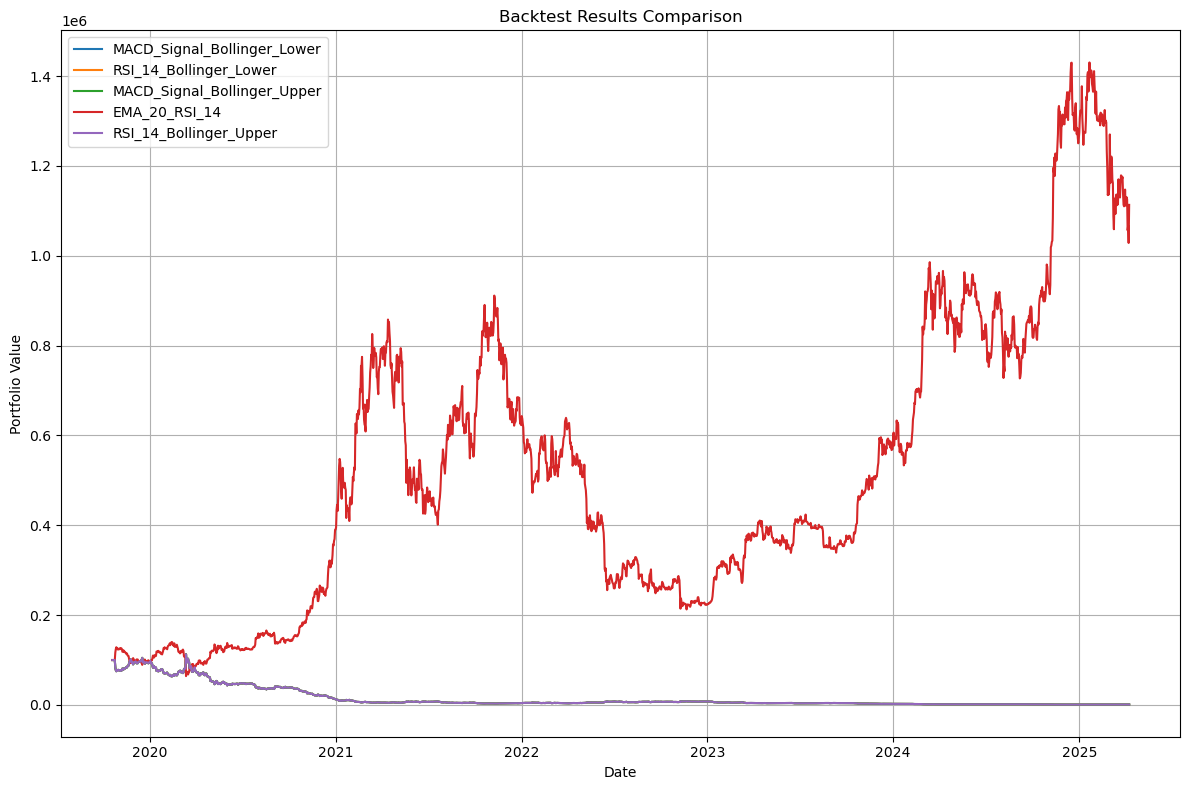

In [14]:
# Visualize results
backtester.plot_results()

In [17]:
# Export results
backtester.export_results()

Results exported to directory: backtest_results_20250412_172223
